# Linear Regression Solution

Autor: Gallileu Genesis 

 


In [1]:
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.2f}'.format)

import warnings
warnings.filterwarnings("ignore")
 

### Banco de dados

O banco de dados de treinamento possui 37137 amostras (entradas/linhas), 8 colunas (features/recursos), além das colunas id e target.

In [2]:
train = pd.read_csv("../Data/train.csv")
print(train.shape)
train.head()

(37137, 10)


,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.39,15.00,3.83,1.11,1280.00,2.49,34.60,-120.12,0.98
1,1,3.72,17.00,6.01,1.05,1504.00,3.81,38.69,-121.22,0.95
2,2,4.78,27.00,6.54,1.10,1061.00,2.46,34.71,-120.45,1.58
3,3,2.41,16.00,3.35,0.97,1255.00,2.09,32.66,-117.09,1.34
4,4,3.75,52.00,4.28,1.07,1793.00,1.60,37.80,-122.41,4.50


O banco de dados de teste possui 24759 amostras (entradas/linhas), 8 colunas (features/recursos), além da coluna id.

In [3]:
test = pd.read_csv("../Data/test.csv")
print(test.shape)
test.head()

(24759, 9)


,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,37137,1.71,35.00,4.97,1.10,1318.00,2.84,39.75,-121.85
1,37138,1.39,22.00,4.19,1.10,2296.00,3.18,33.95,-118.29
2,37139,7.72,21.00,7.13,0.96,1535.00,2.89,33.61,-117.81
3,37140,4.68,49.00,4.77,1.05,707.00,1.74,34.17,-118.34
4,37141,3.13,25.00,3.77,1.08,4716.00,2.00,34.17,-118.29


#### Separar os dados para treinamento

In [4]:
X = train.drop(['id', 'MedHouseVal'], axis=1)
y = train['MedHouseVal']

X_test = test.drop(['id'], axis=1)

#### Definir alguns métodos

In [5]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

def CrossValidation(X, y, model, n_folds, seed):
    scores =  []
    k = KFold(n_splits=n_folds, random_state=seed, shuffle=True)
    for fold, (train_idx, val_idx) in enumerate(k.split(X, y)):
        print(f'\n--- Fold {fold+1} ---')

        x_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        x_val, y_val = X.iloc[val_idx], y.iloc[val_idx]
        predictor = model
        %time predictor.fit(x_train, y_train)

        val_preds = predictor.predict(x_val)
        val_score = rmse(y_val, val_preds)
        scores.append(val_score)

        print(f'--- RMSE: {round(val_score, 6)} ---')

        del x_train, y_train, x_val, y_val, val_preds, val_score, predictor
        gc.collect()

    print('*'*45)
    print(f'Mean RMSE: {round(np.mean(scores), 6)}') 
    
def plot_predictions(predictions, y):
    plt.hist(predictions, label = 'Predictor', bins=50)
    plt.hist(y, label = 'y train', bins=50)

    plt.legend()
    plt.show()

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import gc

In [7]:
seed = 42
n_folds = 7

#### Linear Regression 1

In [8]:
lr_1 = LinearRegression()

CrossValidation(X, y, lr_1, n_folds, seed)


--- Fold 1 ---
CPU times: total: 0 ns
Wall time: 4.99 ms
--- RMSE: 0.752272 ---

--- Fold 2 ---
CPU times: total: 0 ns
Wall time: 7.04 ms
--- RMSE: 0.734615 ---

--- Fold 3 ---
CPU times: total: 0 ns
Wall time: 6.98 ms
--- RMSE: 2.006205 ---

--- Fold 4 ---
CPU times: total: 15.6 ms
Wall time: 4.99 ms
--- RMSE: 0.714229 ---

--- Fold 5 ---
CPU times: total: 0 ns
Wall time: 7 ms
--- RMSE: 0.727589 ---

--- Fold 6 ---
CPU times: total: 0 ns
Wall time: 7.01 ms
--- RMSE: 0.72938 ---

--- Fold 7 ---
CPU times: total: 0 ns
Wall time: 5.95 ms
--- RMSE: 0.712326 ---
*********************************************
Mean RMSE: 0.910945


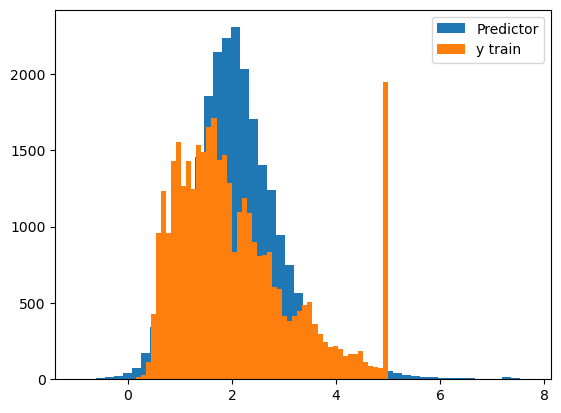

In [9]:
lr_1.fit(X,y)
predictions_1 = lr_1.predict(X_test)
plot_predictions(predictions_1, y)

#### Linear Regression 2

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [11]:
lr_2 = make_pipeline(StandardScaler(), LinearRegression())

CrossValidation(X, y, lr_2, n_folds, seed)


--- Fold 1 ---
CPU times: total: 0 ns
Wall time: 10 ms
--- RMSE: 0.752272 ---

--- Fold 2 ---
CPU times: total: 15.6 ms
Wall time: 11 ms
--- RMSE: 0.734615 ---

--- Fold 3 ---
CPU times: total: 0 ns
Wall time: 10 ms
--- RMSE: 2.006205 ---

--- Fold 4 ---
CPU times: total: 0 ns
Wall time: 8 ms
--- RMSE: 0.714229 ---

--- Fold 5 ---
CPU times: total: 0 ns
Wall time: 14 ms
--- RMSE: 0.727589 ---

--- Fold 6 ---
CPU times: total: 15.6 ms
Wall time: 15 ms
--- RMSE: 0.72938 ---

--- Fold 7 ---
CPU times: total: 15.6 ms
Wall time: 16 ms
--- RMSE: 0.712326 ---
*********************************************
Mean RMSE: 0.910945


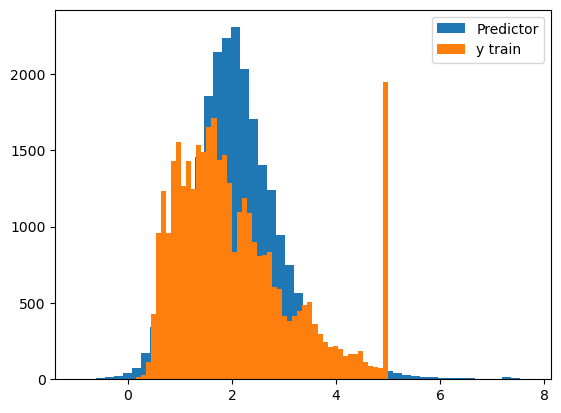

In [12]:
lr_2.fit(X,y)
predictions_2 = lr_2.predict(X_test)
plot_predictions(predictions_2, y)

#### Linear Regression 3

In [13]:
X_prep = X[y<5]
y_prep = y[y<5]

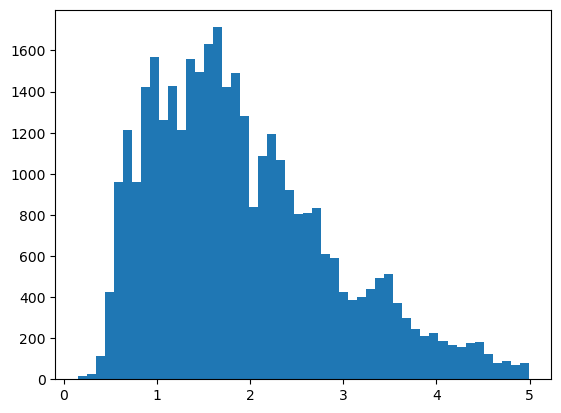

In [14]:
plt.hist(y_prep, bins=50)
plt.show()

In [15]:
lr_3 = make_pipeline(StandardScaler(), LinearRegression())

CrossValidation(X_prep, y_prep, lr_3, n_folds, seed)


--- Fold 1 ---
CPU times: total: 0 ns
Wall time: 9.01 ms
--- RMSE: 0.628408 ---

--- Fold 2 ---
CPU times: total: 15.6 ms
Wall time: 9.99 ms
--- RMSE: 0.625267 ---

--- Fold 3 ---
CPU times: total: 15.6 ms
Wall time: 9.99 ms
--- RMSE: 1.513658 ---

--- Fold 4 ---
CPU times: total: 0 ns
Wall time: 13 ms
--- RMSE: 0.62651 ---

--- Fold 5 ---
CPU times: total: 15.6 ms
Wall time: 13 ms
--- RMSE: 0.627444 ---

--- Fold 6 ---
CPU times: total: 15.6 ms
Wall time: 9.01 ms
--- RMSE: 0.634432 ---

--- Fold 7 ---
CPU times: total: 0 ns
Wall time: 8.52 ms
--- RMSE: 0.627841 ---
*********************************************
Mean RMSE: 0.754794


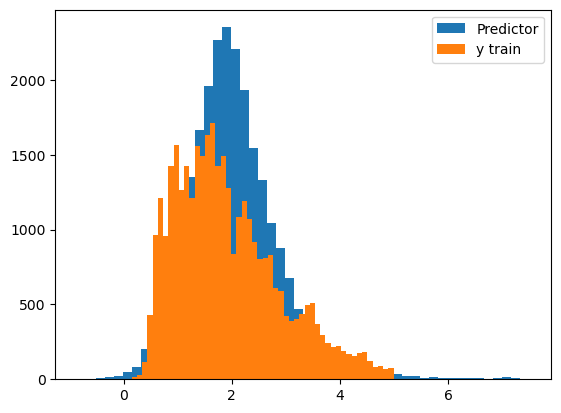

In [16]:
lr_3.fit(X_prep, y_prep)
predictions_3 = lr_3.predict(X_test)
plot_predictions(predictions_3, y_prep)

#### Linear Regression 4

In [17]:
y_prep_log = np.log(y_prep)

In [18]:
lr_4 = make_pipeline(StandardScaler(), LinearRegression())

CrossValidation(X_prep, y_prep_log, lr_4, n_folds, seed)


--- Fold 1 ---
CPU times: total: 0 ns
Wall time: 11 ms
--- RMSE: 0.329351 ---

--- Fold 2 ---
CPU times: total: 0 ns
Wall time: 9 ms
--- RMSE: 0.332 ---

--- Fold 3 ---
CPU times: total: 0 ns
Wall time: 12 ms
--- RMSE: 0.772235 ---

--- Fold 4 ---
CPU times: total: 0 ns
Wall time: 9 ms
--- RMSE: 0.330491 ---

--- Fold 5 ---
CPU times: total: 0 ns
Wall time: 8.96 ms
--- RMSE: 0.329339 ---

--- Fold 6 ---
CPU times: total: 0 ns
Wall time: 10 ms
--- RMSE: 0.337944 ---

--- Fold 7 ---
CPU times: total: 0 ns
Wall time: 8.54 ms
--- RMSE: 0.327718 ---
*********************************************
Mean RMSE: 0.394154


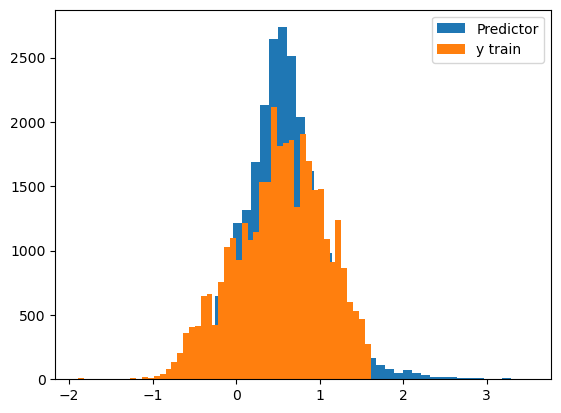

In [19]:
lr_4.fit(X_prep, y_prep_log)
predictions_4 = lr_4.predict(X_test)
plot_predictions(predictions_4, y_prep_log)

#### Linear Regression 5

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_union

In [21]:
lr_5 = make_pipeline(StandardScaler(), 
                     make_union(
                         FunctionTransformer(lambda x: x, validate=True),
                     ),
                     LinearRegression())

CrossValidation(X_prep, y_prep_log, lr_5, n_folds, seed)


--- Fold 1 ---
CPU times: total: 0 ns
Wall time: 11 ms
--- RMSE: 0.329351 ---

--- Fold 2 ---
CPU times: total: 15.6 ms
Wall time: 12 ms
--- RMSE: 0.332 ---

--- Fold 3 ---
CPU times: total: 15.6 ms
Wall time: 17 ms
--- RMSE: 0.772235 ---

--- Fold 4 ---
CPU times: total: 0 ns
Wall time: 14 ms
--- RMSE: 0.330491 ---

--- Fold 5 ---
CPU times: total: 15.6 ms
Wall time: 12 ms
--- RMSE: 0.329339 ---

--- Fold 6 ---
CPU times: total: 15.6 ms
Wall time: 17 ms
--- RMSE: 0.337944 ---

--- Fold 7 ---
CPU times: total: 15.6 ms
Wall time: 15.5 ms
--- RMSE: 0.327718 ---
*********************************************
Mean RMSE: 0.394154


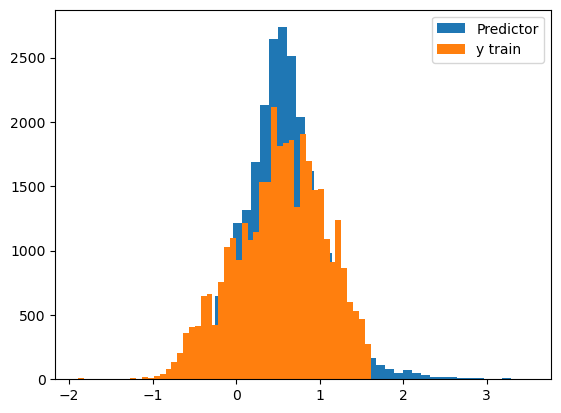

In [22]:
lr_5.fit(X_prep, y_prep_log)
predictions_5 = lr_5.predict(X_test)
plot_predictions(predictions_5, y_prep_log)

#### Linear Regression 6

In [23]:
def CrossValidation(X, y, X_test, model, n_folds, seed):
    predictions, scores = np.zeros(len(test)), []
    k = KFold(n_splits=n_folds, random_state=seed, shuffle=True)
    for fold, (train_idx, val_idx) in enumerate(k.split(X, y)):
        print(f'\n--- Fold {fold+1} ---')

        x_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        x_val, y_val = X.iloc[val_idx], y.iloc[val_idx]
        predictor = model
        %time predictor.fit(x_train, y_train)

        val_preds = predictor.predict(x_val)
        val_score = rmse(y_val, val_preds)
        scores.append(val_score)
        
        predictions += predictor.predict(X_test) / n_folds

        print(f'--- RMSE: {round(val_score, 6)} ---')

        del x_train, y_train, x_val, y_val, val_preds, val_score, predictor
        gc.collect()

    print('*'*45)
    print(f'Mean RMSE: {round(np.mean(scores), 6)}') 
    return predictions

In [24]:
predictions_6 = CrossValidation(X_prep, y_prep_log, X_test, lr_5, n_folds, seed)


--- Fold 1 ---
CPU times: total: 0 ns
Wall time: 13 ms
--- RMSE: 0.329351 ---

--- Fold 2 ---
CPU times: total: 15.6 ms
Wall time: 12 ms
--- RMSE: 0.332 ---

--- Fold 3 ---
CPU times: total: 15.6 ms
Wall time: 14 ms
--- RMSE: 0.772235 ---

--- Fold 4 ---
CPU times: total: 15.6 ms
Wall time: 17 ms
--- RMSE: 0.330491 ---

--- Fold 5 ---
CPU times: total: 15.6 ms
Wall time: 16 ms
--- RMSE: 0.329339 ---

--- Fold 6 ---
CPU times: total: 15.6 ms
Wall time: 25 ms
--- RMSE: 0.337944 ---

--- Fold 7 ---
CPU times: total: 15.6 ms
Wall time: 17 ms
--- RMSE: 0.327718 ---
*********************************************
Mean RMSE: 0.394154


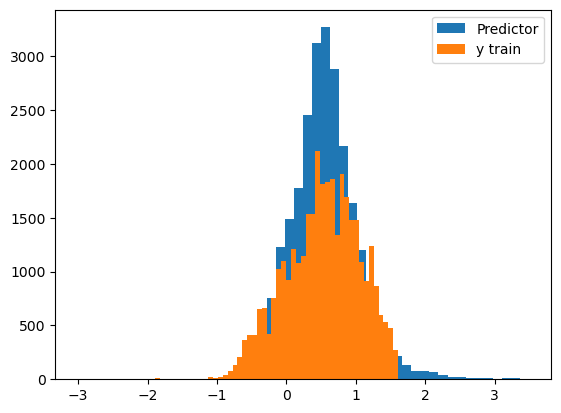

In [25]:
plot_predictions(predictions_6, y_prep_log)

In [31]:
df_sub = test.copy()
df_sub['MedHouseVal'] = np.exp(predictions_4)
df_sub[['id','MedHouseVal']].to_csv('LR_Predictions_4.csv', index=False)

In [32]:
df_sub = test.copy()
df_sub['MedHouseVal'] = np.exp(predictions_5)
df_sub[['id','MedHouseVal']].to_csv('LR_Predictions_5.csv', index=False)

In [33]:
df_sub = test.copy()
df_sub['MedHouseVal'] = np.exp(predictions_6)
df_sub[['id','MedHouseVal']].to_csv('LR_Predictions_6.csv', index=False)

#### Score:

- **LR_Predictions_6.csv:** 1.35543

- **LR_Predictions_5.csv:** 1.36788

- **LR_Predictions_4.csv:** 1.36788

